영문 워드 크라우드

In [1]:
#NLTK(Natural Language Toolkit)
import nltk

In [2]:
# Colab: 접속할때 마다 다운 받아야함
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image   # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

1. stopwords(불용어) 처리

In [4]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# stopwords of wordCloud
sw_wc = STOPWORDS
print(sw_wc)

{'about', 'ever', "they've", 'been', 'who', "i'd", 'few', "hasn't", 'only', "mustn't", "they're", "how's", 'its', "shan't", 'where', 'those', 'our', 'own', 'through', 'each', "weren't", 'your', 'down', "they'd", 'during', 'is', 'them', 'get', "you've", "when's", 'she', 'the', 'yourselves', 'do', "what's", 'am', "i'll", "it's", "can't", 'otherwise', 'k', "you'd", 'if', 'after', 'has', 'was', 'they', 'can', 'while', 'any', 'com', 'just', "she'll", "he's", 'www', 'why', 'some', 'again', 'are', 'else', "we'll", 'doing', 'between', 'should', 'above', 'because', 'below', 'such', "wouldn't", "where's", 'which', 'or', 'these', "didn't", 'up', "shouldn't", "you'll", 'as', 'to', 'could', 'were', "i'm", "doesn't", 'when', "she's", "they'll", 'a', 'cannot', 'it', 'off', 'once', 'until', 'we', 'ourselves', "we're", 'how', 'does', 'into', 'no', 'that', "i've", 'having', 'ought', 'very', 'all', "haven't", 'ours', 'too', 'herself', "he'd", 'however', "couldn't", 'would', 'further', 'hers', "who's", 'w

In [6]:
print(len(sw_nltk), len(sw_wc))

179 192


2. 이상한나라 엘리스 분석

In [8]:
with open('./Alice.txt') as file:
  text = file.read()

In [9]:
text

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [10]:
# 'said' 단어를 불용어에 추가
sw_wc.add('said')
sw_wc

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [11]:
wc = WordCloud(background_color = 'white', max_words = 2000, stopwords=sw_wc)
wc = wc.generate(text)

In [23]:
wc

In [13]:
wc.words_ # .words_ is only for WordCloud object

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

In [14]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


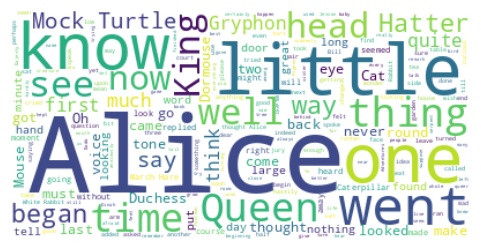

In [15]:
plt.figure(figsize = (7, 3))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

그림위에 표시하기

In [17]:
mask = np.array(Image.open('./Alice_mask.png'))
type(mask)

numpy.ndarray

In [18]:
mask
# Values of 255 are pure white, whereas values of 0 are black. 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [19]:
np.unique(mask)

array([  0, 255], dtype=uint8)

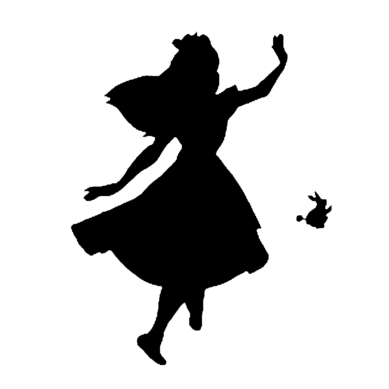

In [20]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation = 'bilinear')
# more about interpolation:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
plt.axis('off')
plt.show()

In [21]:
wc = WordCloud(background_color = 'white', max_words = 2000, stopwords=sw_wc, mask=mask).generate(text)


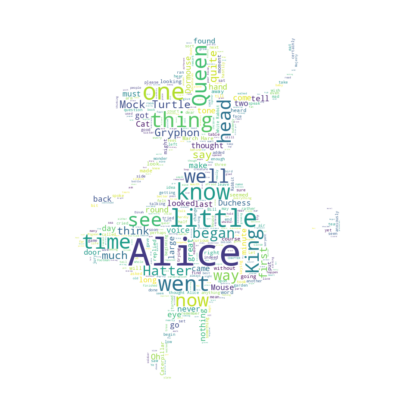

In [22]:
plt.figure(figsize=(5,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()